# 1. Introduction
The study of enzymes, specialized proteins that catalyze biochemical reactions, is crucial for understanding the mechanisms behind many biological processes. One of the most challenging tasks in bioinformatics is to predict the enzymes acting on a specific substrate from sequence or structure data. In this Kaggle competition, we tackle the problem of multi-label classification of enzyme substrates from a dataset of molecular features.

## 1.1. Problem Summary
In this Kaggle competition, the primary task is to develop a model capable of accurately predicting the classifications of enzymes, specifically EC1 and EC2. These are not simply classifications, but rather represent specific types of enzymes that interact with substrates in unique ways. Our predictions will be made for each identifier in the test set, based on a collection of molecular features.

To understand this task more profoundly, it's important to grasp the biological basis behind it. Enzymes are specialized proteins that accelerate chemical reactions within organisms. For instance, specific enzymes in your stomach aid in breaking down ingested food into smaller, usable components for your body.

A crucial characteristic of enzymes is that they interact with particular substrates in a manner reminiscent of a key fitting into a lock. In this analogy, the enzyme represents the key, while the substrate represents the lock. Intriguingly, this interaction isn't exclusive — one type of enzyme can interact with multiple substrates, and a single substrate can be acted upon by several enzymes.

This unique many-to-many interaction brings about the main challenge of this competition. We are tasked to predict which type of enzyme, either EC1 or EC2, will interact with a substrate based on the substrate's specific features. In essence, our model should determine the "correct key" for each "lock" by examining the properties of the lock.

The complexity of this task arises from the need to predict multiple "keys" for each "lock", a situation that defines this as a multi-label classification problem.

As for the evaluation of submissions, the primary metric utilized is the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). This metric measures how well your model can distinguish between different types of enzymes. Your model's predictions will be compared to the actual classifications, with the final score being the average AUC of each predicted column. This offers a balanced view of the model's performance across the different targets.

## 1.2. Dataset
The dataset provided for this competition consists of various molecular features, including BertzCT, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3v, Chi4n, EState_VSA1, EState_VSA2, ExactMolWt, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, HallKierAlpha, HeavyAtomMolWt, Kappa3, MaxAbsEStateIndex, MinEStateIndex, NumHeteroatoms, PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, SMR_VSA10, SMR_VSA5, SlogP_VSA3, VSA_EState9, fr_COO, fr_COO2, EC1, EC2, EC3, EC4, EC5, EC6.

## 1.3. Feature Characteristics
The features provided in the dataset are a combination of various structural and physicochemical features of the molecules, such as the exact molecular weight (ExactMolWt), the number of heteroatoms (NumHeteroatoms), and various topological and electrostatic features (BertzCT, Chi1, Chi1n, etc.). Each of these features captures a unique aspect of the molecule's structure and function, and they are expected to contribute significantly to the prediction of enzyme activity.

- Identifier:

    - id: Unique Identifier.

- Molecular Descriptors (information about the size, weight, and presence of specific atoms):

    - ExactMolWt: Exact molecular weight.
    - HeavyAtomMolWt: Molecular weight of heavy atoms (excluding hydrogens).
    - NumHeteroatoms: Number of heteroatoms (atoms other than carbon and hydrogen).
  

- Connectivity and Structural Descriptors (capturing different aspects of the connectivity and complexity of the molecule):

    - BertzCT: Bertz complexity index.
    - Chi1: 1st order molecular connectivity index.
    - Chi1n: Chi1 normalized.
    - Chi1v: 1st order molecular variance connectivity index.
    - Chi2n: 2nd order molecular connectivity index.
    - Chi2v: 2nd order molecular variance connectivity index.
    - Chi3v: 3rd order molecular variance connectivity index.
    - Chi4n: 4th order molecular connectivity index, normalized.
    - HallkierAlpha: The Hall-Kier alpha value for a molecule.
    - Kappa3: Hall-Kier Kappa3 value.


- Surface Area Contribution Descriptors (provide information about the surface area contributions for specific atom type fragments within the molecule):

    - EState_VSA1, EState_VSA2: Electrotopological state.
    - PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8: Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type.
    - SMR_VSA10, SMR_VSA5: Solvent-accessible surface area Van der Waals surface area contribution for a specific atom type.
    - SlogP_VSA3: LogP-based surface area contribution.
    - VSA_EState9: E-state fragment contribution for Van der Waals surface area calculation.


- Fingerprint Density Descriptors (represent the density or count of specific substructures in the Morgan fingerprint):

    - FpDensityMorgan1: Morgan fingerprint density for radius 1.
    - FpDensityMorgan2: Morgan fingerprint density for radius 2.
    - FpDensityMorgan3: Morgan fingerprint density for radius 3.
  

- Functional Groups:
    - fr_COO, fr_COO2: Number of carboxyl (COO) functional groups, ranging 0-8.
  

- EC Classifications:

    - EC1: Binary feature, Oxidoreductases - catalyze oxidation-reduction reactions, involving the transfer of electrons between molecules.
    - EC2: Binary feature, Transferases - transfer functional groups (e.g., methyl, acetyl, phosphoryl) between molecules.
    - EC3: Binary feature, Hydrolases - catalyze the hydrolysis (breaking of chemical bonds with water) of various substances.
    - EC4: Binary feature, Lyases - catalyze the addition or removal of groups from substrates without hydrolysis or oxidation.
    - EC5: Binary feature, Isomerases - catalyze the rearrangement of atoms within a molecule to form isomers (same molecular formula, different arrangement).
    - EC6: Binary feature, Ligases - catalyze the joining of two molecules through the formation of new chemical bonds.


## 1.4. Methodology
The problem posed in this competition is a multi-label classification problem. Given the feature set provided, the methodological approach will involve the use of machine learning and/or deep learning techniques to build a model that is capable of predicting the EC1 and EC2 targets. As the model's performance is evaluated based on AUC-ROC, the methodology will also need to include strategies to maximize this metric. Lastly, as the problem involves predicting multiple labels, it may be useful to consider approaches specific to multi-label classification, such as chain classifiers or problem transformation methods.

# Data processing

## Import and basic analysis

In [66]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [67]:
import pandas as pd

X_train = pd.read_csv('input/train.csv')
X_test = pd.read_csv('input/test.csv')
X_original = pd.read_csv('input/mixed_desc.csv')


id_test = X_test['id']

In [68]:
X_train.drop(['id'], axis=1, inplace=True)
X_test.drop(['id'], axis=1, inplace=True)

In [69]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the testing data: ', X_test.shape)
print('Shape of the original data: ', X_original.shape)

Shape of the training data:  (14838, 37)
Shape of the testing data:  (9893, 31)
Shape of the original data:  (1039, 198)


In [70]:
# Select columns names of X_train in X_original
X_train_cols = X_train.columns.tolist()
X_original_cols = X_original.columns.tolist()
X_original_cols = [x for x in X_original_cols if x in X_train_cols]
X_original_cols.append('EC1_EC2_EC3_EC4_EC5_EC6')

X_originalF = X_original.copy()
X_originalF = X_originalF[X_original_cols]

In [71]:
X_originalF.shape

(1039, 32)

In [72]:
# Split 'EC1_EC2_EC3_EC4_EC5_EC6' column by delimiter '_'
X_originalF['EC1'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[0]
X_originalF['EC2'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[1]
X_originalF['EC3'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[2]
X_originalF['EC4'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[3]
X_originalF['EC5'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[4]
X_originalF['EC6'] = X_originalF['EC1_EC2_EC3_EC4_EC5_EC6'].str.split('_').str[5]

# Drop 'EC1_EC2_EC3_EC4_EC5_EC6' column
X_originalF.drop(['EC1_EC2_EC3_EC4_EC5_EC6'], axis=1, inplace=True)

In [73]:
X_original = X_originalF.copy()

In [74]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the testing data: ', X_test.shape)
print('Shape of the original data: ', X_original.shape)

Shape of the training data:  (14838, 37)
Shape of the testing data:  (9893, 31)
Shape of the original data:  (1039, 37)


In [75]:
X_original.head()

,MinEStateIndex,MaxAbsEStateIndex,HeavyAtomMolWt,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,HallKierAlpha,Kappa3,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,EState_VSA1,EState_VSA2,VSA_EState9,NumHeteroatoms,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,-4.638889,8.881944,94.970,97.976895,1.200000,1.200000,1.200000,49.783540,2.000000,0.782574,2.347723,0.513277,1.539831,0.000000,0.000000,0.11,1512.242231,0.0,7.822697,0.0,0.0,0.000000,7.822697,0.000000,4.565048,7.822697,0.000000,16.923611,5,0,0,1,1,1,1,0,1
1,-5.050347,9.626875,173.941,177.943226,0.888889,1.111111,1.111111,147.355172,3.707107,1.530297,4.590890,1.062804,3.678309,1.914534,0.138556,0.26,8.260000,0.0,15.645394,0.0,0.0,0.000000,15.645394,0.000000,13.440728,15.645394,0.000000,20.899028,9,0,0,1,1,1,1,0,1
2,0.000000,0.000000,14.007,17.026549,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.04,-104.040000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.150546,0.000000,1,0,0,1,1,1,1,0,1
3,-0.931481,10.860741,124.055,130.037842,1.777778,2.333333,2.666667,172.720106,4.947265,2.081214,2.081214,1.157830,1.157830,0.489278,0.180980,-1.10,1.394403,0.0,50.712056,0.0,0.0,0.000000,11.876485,13.089513,9.589074,12.514062,12.451936,35.105740,7,1,1,0,1,1,0,0,0
4,-1.379630,9.543981,84.030,88.016044,1.500000,1.666667,1.666667,72.039100,2.642734,1.381855,1.381855,0.861339,0.861339,0.301176,0.000000,-0.86,1.458471,0.0,5.969305,0.0,0.0,6.923737,11.752550,6.923737,9.589074,11.752550,0.000000,25.333333,3,1,1,1,1,1,1,0,1


In [76]:
X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0


In [77]:
X_train.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,292.623087,1.236774,1.812070,2.255470,-1.207776,274.950211,5.874372,10.556443,-2.119772,8.584108,11.021644,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,225.384140,5.491284,5.495565,5.501200,0.935314,212.678755,45.730226,1.559331,2.066415,7.643769,13.958962,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007276,-666.000000,-666.000000,-666.000000,-7.730000,0.000000,-104.040000,0.000000,-6.327514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,148.037173,1.045455,1.690909,2.100000,-1.660000,136.109000,1.784008,9.926190,-4.659604,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,206.042653,1.250000,1.865152,2.358491,-1.100000,194.276500,3.261011,10.421334,-1.265370,6.000000,6.041841,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,343.090331,1.500000,2.062153,2.500000,-0.570000,326.002000,5.848400,11.539743,-0.787037,10.000000,18.311899,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,2237.318490,3.000000,3.200000,3.400000,0.820000,2035.133000,1512.242231,15.630251,6.000000,42.000000,97.663462,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [79]:
X_test.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
count,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,516.411916,9.106998,5.848047,6.733659,4.428979,5.247994,3.401083,1.750078,28.956335,10.534500,292.006497,1.280917,1.861792,2.304095,-1.206781,274.583106,5.280890,10.555415,-2.098765,8.590215,11.033200,18.493154,8.917260,11.222822,6.789234,15.810550,30.919849,13.601593,49.426755,0.459719,0.461235
std,544.327795,6.754583,4.641662,5.863886,3.770031,4.939702,3.431766,1.837159,31.470865,13.768117,224.667454,0.361229,0.348650,0.382551,0.923173,212.321052,37.349006,1.572745,2.059608,7.660447,13.905575,35.832279,19.358857,20.015732,10.778071,18.265549,33.532665,14.689893,29.542758,0.676657,0.677194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.007276,-1.133333,0.416667,0.361111,-7.620000,14.007000,-104.040000,0.000000,-6.117075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.061146,0.000000,0.000000
25%,150.255712,4.698377,2.846050,2.934030,1.949719,2.049137,1.171060,0.508512,5.969305,0.000000,148.073559,1.043478,1.692308,2.100000,-1.680000,140.050000,1.788507,9.946009,-4.638889,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000
50%,289.901774,6.447265,4.009996,4.337841,2.930013,3.168052,1.923982,1.058931,17.282269,6.420822,206.021523,1.250000,1.866667,2.358491,-1.100000,194.125000,3.261011,10.418624,-1.252751,6.000000,6.041841,5.969305,0.000000,5.563451,0.000000,11.752550,19.765380,9.589074,41.666667,0.000000,0.000000
75%,652.758463,10.966946,7.490880,8.528316,5.788793,6.516914,4.302610,2.509394,44.876559,12.841643,342.116212,1.500000,2.071429,2.520000,-0.570000,320.121000,5.772640,11.526326,-0.787037,10.000000,18.311899,17.907916,12.132734,13.344559,6.923737,17.744066,42.727765,14.383612,56.083333,1.000000,1.000000
max,3919.541449,53.876516,43.283925,53.990574,36.368883,44.726398,26.736931,15.620667,363.705954,99.936429,1888.793611,3.000000,3.200000,3.375000,0.830000,1758.846000,1512.242231,14.630251,4.750000,53.000000,122.017202,482.434223,258.844527,271.424271,96.917997,79.920667,492.729739,115.406157,384.450519,8.000000,8.000000


# Concatenation of X_train and X_original

In [80]:
X_total = pd.concat([X_train, X_original], axis=0)

In [81]:
# Submission to a file
## Training data
X_total.to_csv('data/X_total.csv', index=False)

# EDA

## High correlation between features

In [82]:
# Due to the high dimensionality of the data, we will check the correlation between the features 

# Features with correlation greater than 0.99 with other features
corr_1 = X_train.corr()
corr_1 = (corr_1 > 0.99)
corr_1 = corr_1.sum()
corr_1 = corr_1[corr_1 > 1]
corr_1 = corr_1.index.tolist()
corr_1

# Cols to drop
ColsDrop = ['ExactMolWt', 'FpDensityMorgan1', 'fr_COO']
X_train.drop(ColsDrop, axis=1, inplace=True)
X_total.drop(ColsDrop, axis=1, inplace=True)
X_test.drop(ColsDrop, axis=1, inplace=True)

## EDA - Exploratory Data Analysis

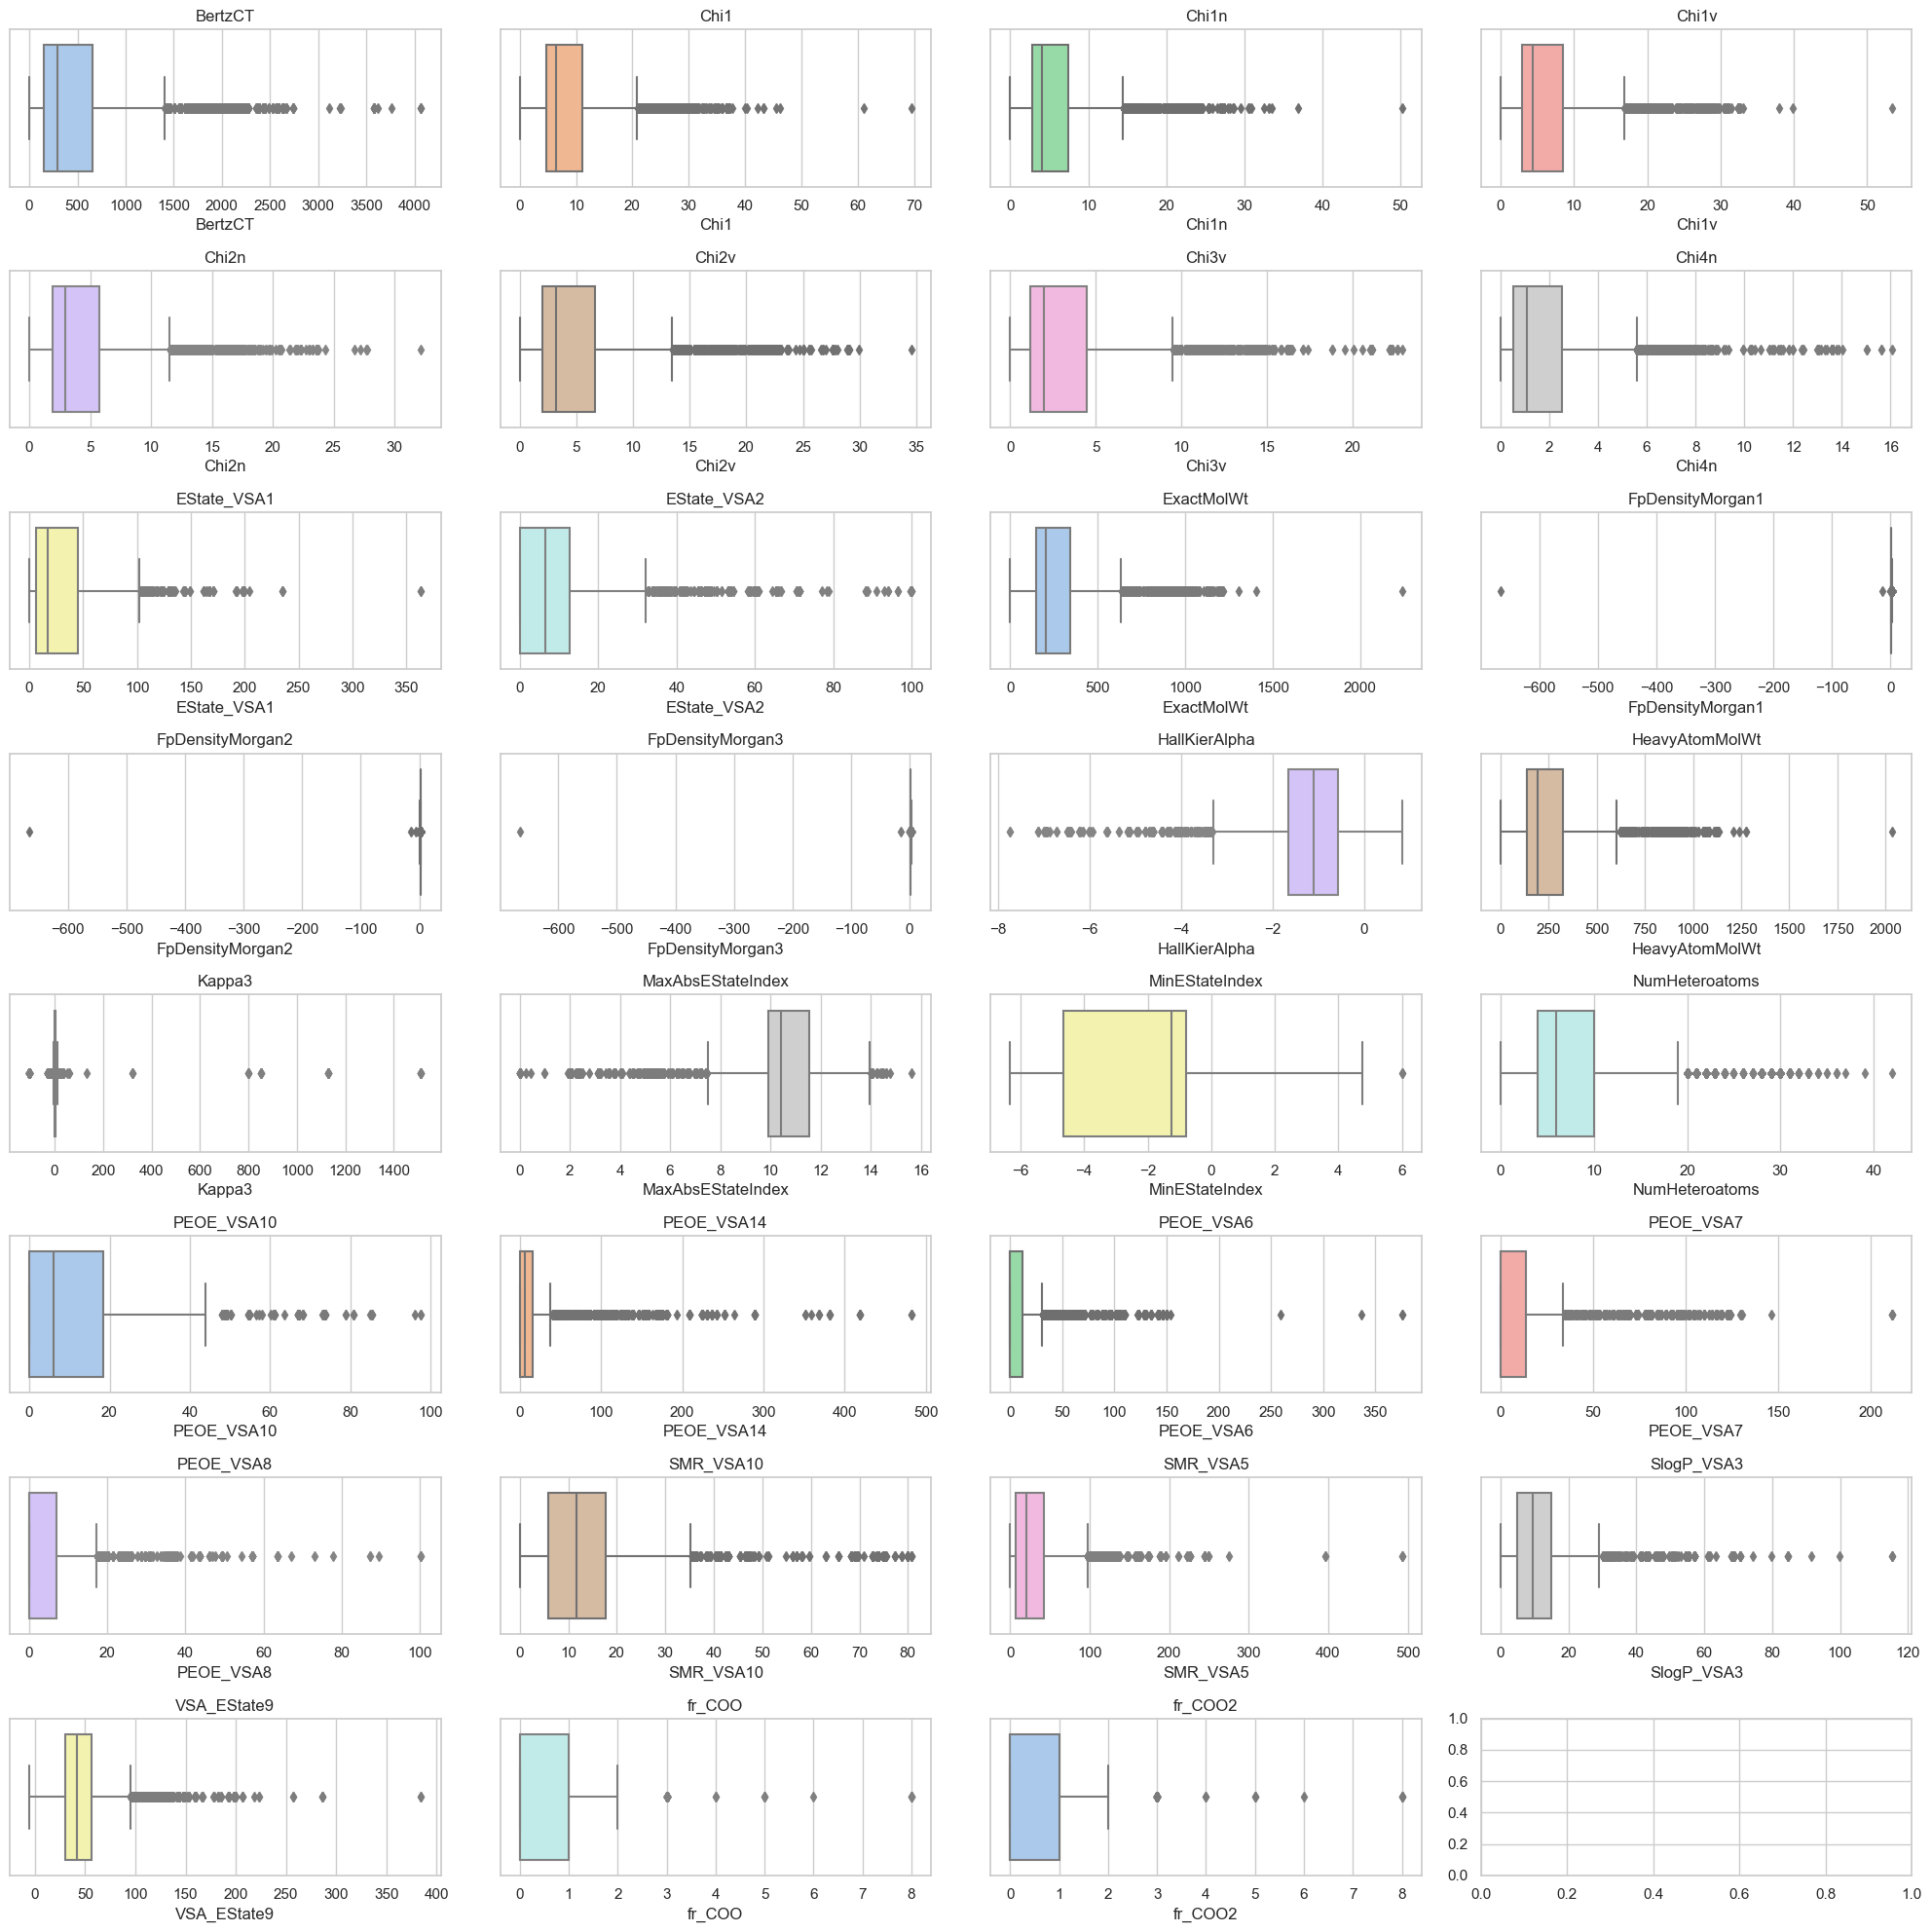

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")

selected_columns = X_train.columns[:-6]

fig, ax = plt.subplots(8, 4, figsize=(20, 20))

for i, column in enumerate(selected_columns):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=X_train[column], color=palette[i % len(palette)])
    plt.title(column)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

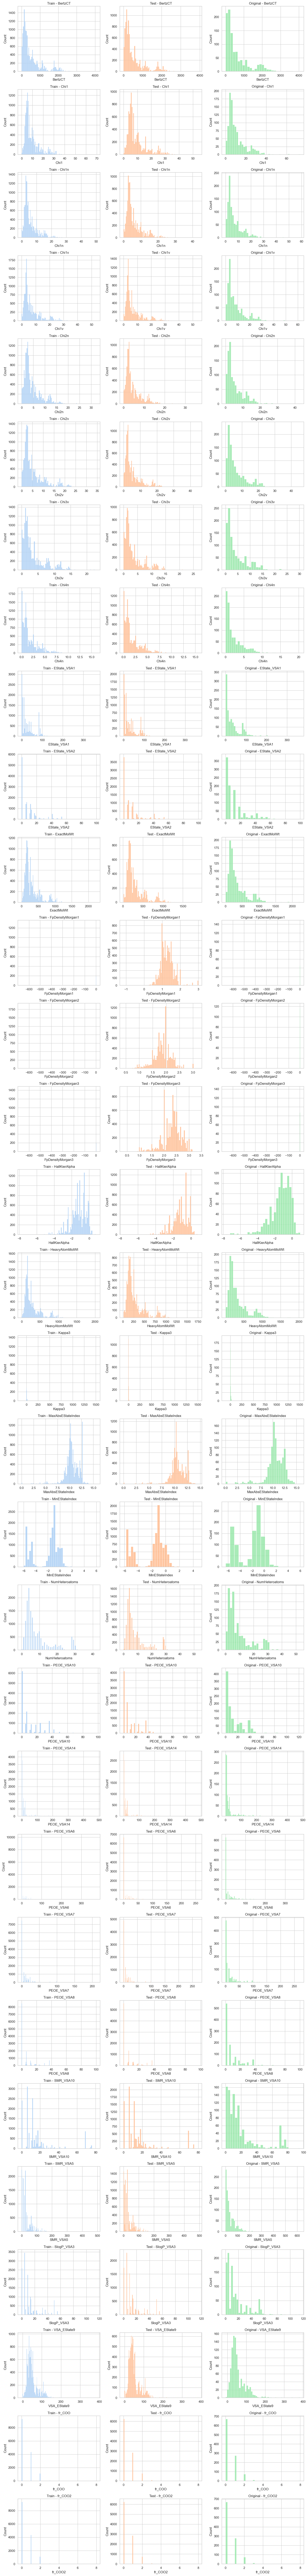

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")

selected_columns = X_train.columns[:-6]

fig, ax = plt.subplots(len(selected_columns), 3, figsize=(15, 4*len(selected_columns)))

for i, column in enumerate(selected_columns):
    sns.histplot(X_train[column], color=palette[0], ax=ax[i, 0])
    ax[i, 0].set_title(f'Train - {column}')
    sns.histplot(X_test[column], color=palette[1], ax=ax[i, 1])
    ax[i, 1].set_title(f'Test - {column}')
    sns.histplot(X_original[column], color=palette[2], ax=ax[i, 2])
    ax[i, 2].set_title(f'Original - {column}')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


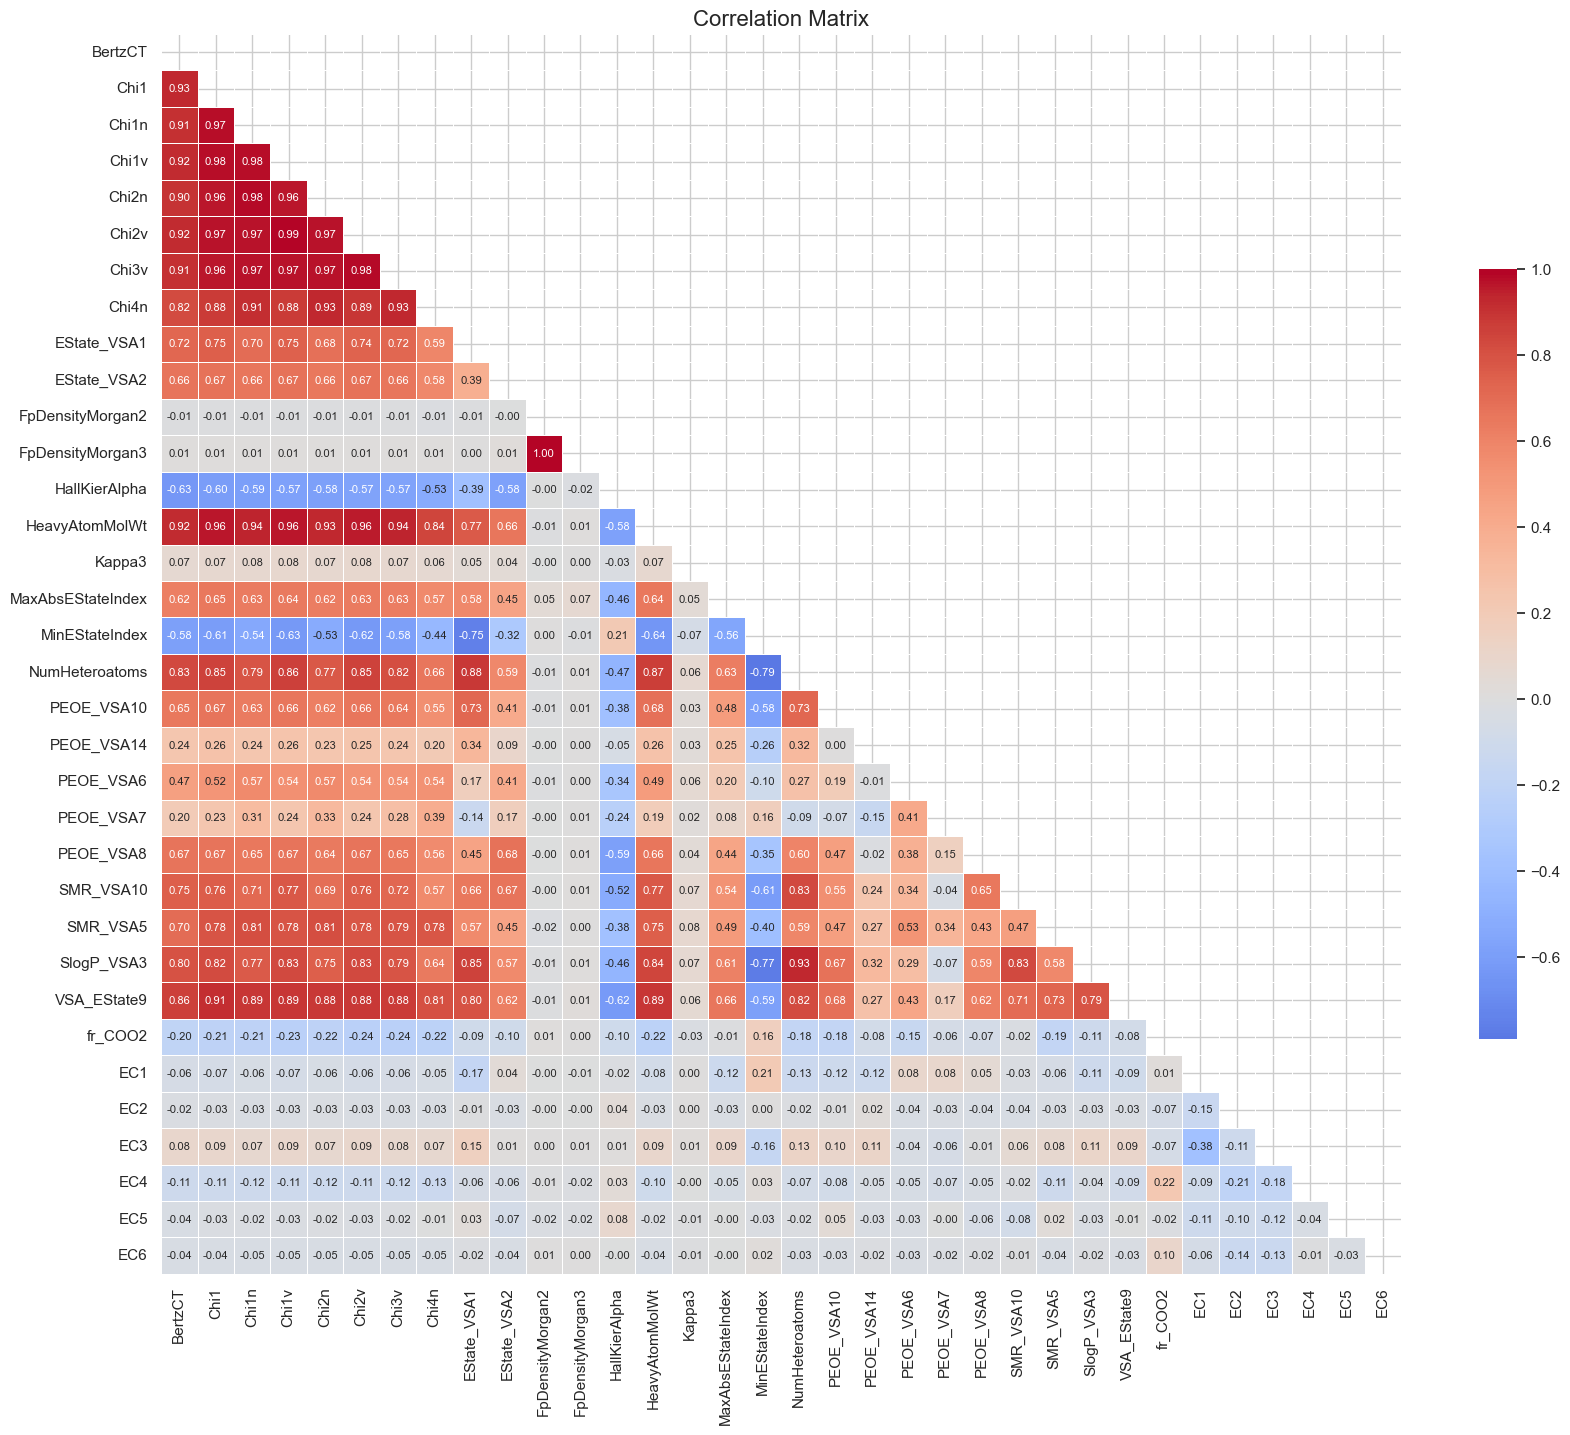

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = X_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=16)
plt.show()



### Missing values

In [9]:
# Table with the number of missing values for each feature or nan values
X_train.isnull().sum()  

BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

### Null values

In [10]:
# Nan values in the training data
X_train.isna().sum()

BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

### Duplicated values

In [11]:
## Duplicate values in the training data
X_train.duplicated().sum()

0

### Unique values

In [12]:
X_train.nunique().sort_values()

EC6                     2
EC4                     2
EC3                     2
EC2                     2
EC1                     2
EC5                     2
fr_COO2                 8
fr_COO                  8
NumHeteroatoms         40
SlogP_VSA3            217
PEOE_VSA6             219
PEOE_VSA8             237
PEOE_VSA10            250
PEOE_VSA7             262
PEOE_VSA14            291
HallKierAlpha         388
SMR_VSA10             409
EState_VSA2           445
SMR_VSA5              492
FpDensityMorgan1      556
FpDensityMorgan2      650
FpDensityMorgan3      654
EState_VSA1           719
HeavyAtomMolWt        860
Chi1                 1259
ExactMolWt           1666
VSA_EState9          1946
MinEStateIndex       2142
Kappa3               2245
MaxAbsEStateIndex    2356
BertzCT              2368
Chi4n                2930
Chi1n                3157
Chi1v                3306
Chi3v                3448
Chi2n                3634
Chi2v                3725
dtype: int64

In [64]:
# No duplicate values, no nan values, no missing values

## Feature engineering 

In [15]:
X_train_FE = X_train.copy()
X_test_FE = X_test.copy()

### Temperature relation

In [25]:
import numpy as np

def feature_engineering(df):
    df['RelationTemperature'] = df['Air_temperature_K'] / df['Process_temperature_K']
    df['TorqueRPM'] = df['Torque_Nm'] / df['Rotational_speed_rpm']
    df['WearRPM'] = df['Tool_wear_min'] / df['Rotational_speed_rpm']
    df['ToolWearTorque'] = df['Tool_wear_min'] / df['Torque_Nm']

    for col in ['Torque_Nm', 'Tool_wear_min', 'Rotational_speed_rpm']:
        df[f'{col}_B'] = pd.cut(df[col], bins=20)
        df[f'{col}_B'] = df[f'{col}_B'].cat.codes + 1

    df['TotalF'] = df['TWF'] + df['HDF'] + df['PWF'] + df['OSF']

    Angular_velocity = df['Rotational_speed_rpm'] * 2 * np.pi / 60

    df['Power_W'] = df['Torque_Nm'] * Angular_velocity
    
    df['Energy_J'] = df['Power_W'] * df['Tool_wear_min'] *60

    return df

X_train_FE = feature_engineering(X_train_FE)
X_test_FE = feature_engineering(X_test_FE)


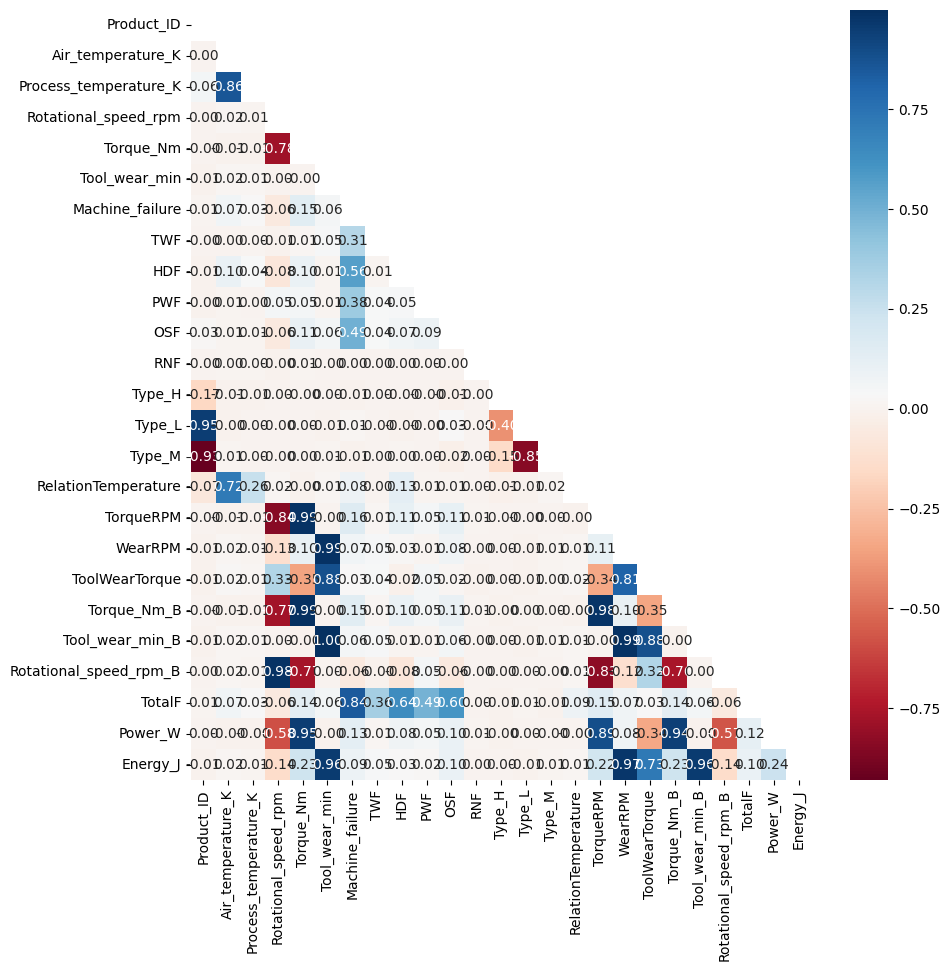

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = X_train_FE.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (30, 30)
plt.show()

Drop by 

## RFECV - Recursive Feature Elimination with Cross-Validation

# Results saving

In [28]:
# Table of Shapes of X_train ,X_train_FE, X_total_FE, X_total, X_train_FR_RFECV and X_train_cat
print('Shape of the training data: ', X_train.shape)
print('Shape of the training data with FE: ', X_train_FE.shape)
print('Shape of the training data with FE and OHE: ', X_train_FR_RFECV.shape)
print('Shape of the original data with trainning data and FE: ', X_total_FE.shape)
print('Shape of the original data with trainning data: ', X_total.shape)
print('Shape of the training data CAT: ', X_train_CAT.shape)

Shape of the training data:  (136429, 15)
Shape of the training data with FE:  (136429, 25)
Shape of the training data with FE and OHE:  (136429, 22)
Shape of the original data with trainning data and FE:  (146429, 25)
Shape of the original data with trainning data:  (146429, 15)
Shape of the training data CAT:  (146429, 13)


In [29]:
# Submission to a file
## Training data
X_train.to_csv('data/X_train.csv', index=False)
X_train_FE.to_csv('data/X_train_FE.csv', index=False)
## Test data
X_test.to_csv('data/X_test.csv', index=False)
X_test_FE.to_csv('data/X_test_FE.csv', index=False)

## Original data concatenated with the training data
X_total.to_csv('data/X_total.csv', index=False)
X_total_FE.to_csv('data/X_total_FE.csv', index=False)

# Training data with Feature reduction
## RFECV - Recursive Feature Elimination with Cross-Validation
X_train_FR_RFECV.to_csv('data/X_train_FR.csv', index=False)
X_test_FR_RFECV.to_csv('data/X_test_FR.csv', index=False)

In [30]:
## Original data CAT 
X_train_CAT.to_csv('data/X_train_CAT.csv', index=False)
X_test_CAT.to_csv('data/X_test_CAT.csv', index=False)
